# Working on multiple time series


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)

DATA_PATH = "../data/raw"


In [3]:
url_meat = os.path.join(DATA_PATH, "meat.csv")


In [5]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat["date"] = pd.to_datetime(meat.date)

# Set the date column as the index of your DataFrame meat
meat = meat.set_index(["date"])

# Print the summary statistics of the DataFrame
print(meat.describe())


         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

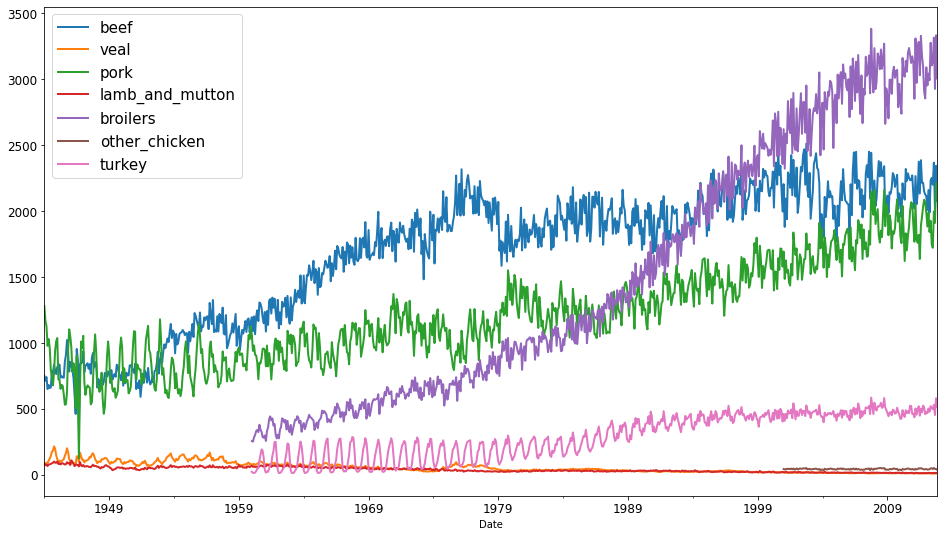

In [6]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel("Date")
ax.legend(fontsize=15)

# Show plot
plt.show()


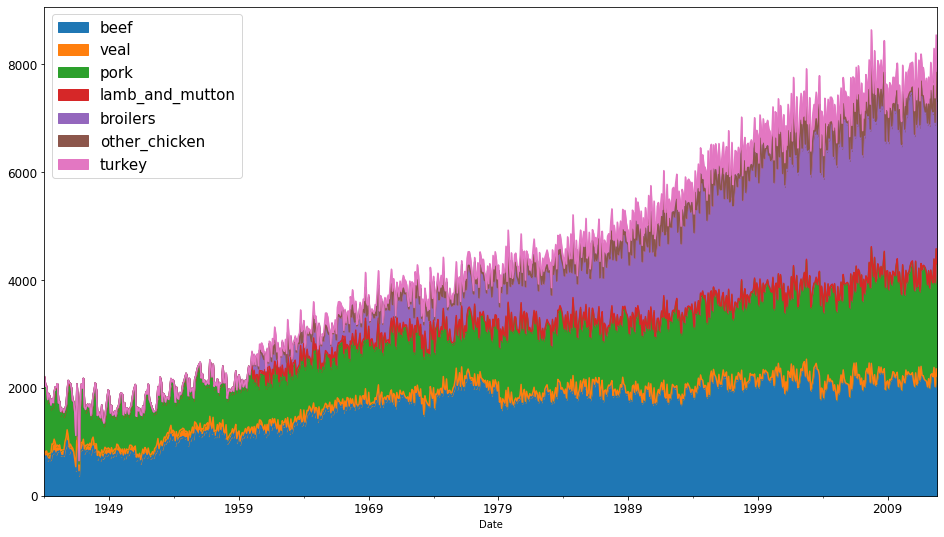

In [7]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel("Date")
ax.legend(fontsize=15)

# Show plot
plt.show()


## Plot multiple time series


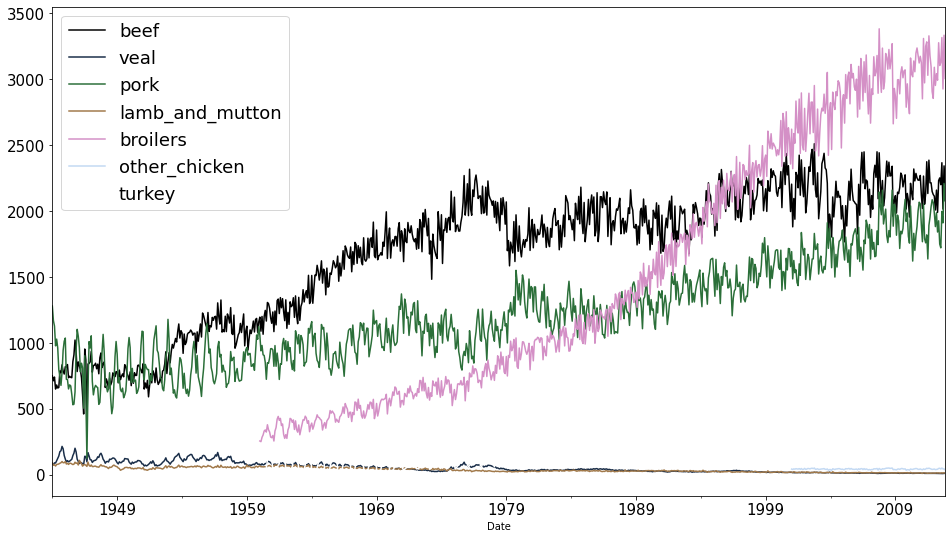

In [8]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap="cubehelix", fontsize=15)

# Additional customizations
ax.set_xlabel("Date")
ax.legend(fontsize=18)

# Show plot
plt.show()


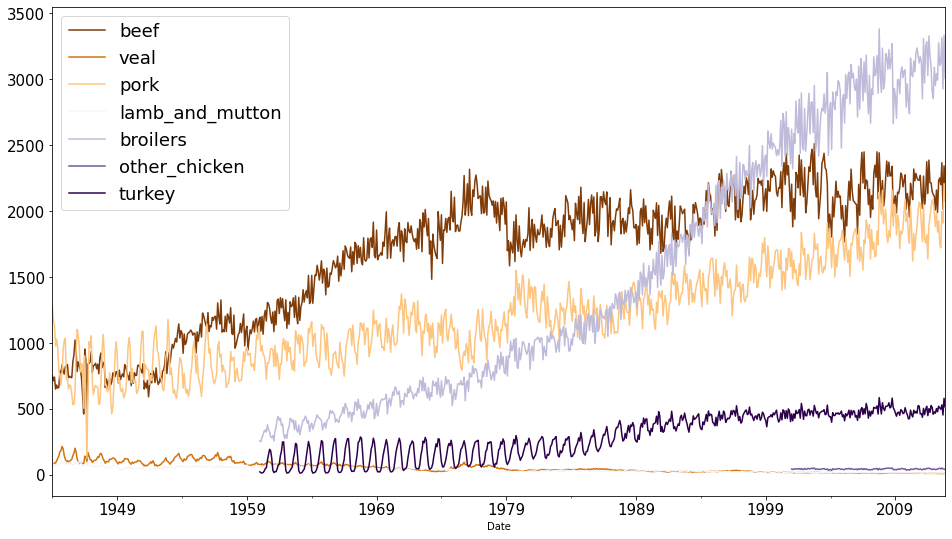

In [9]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap="PuOr", fontsize=15)

# Additional customizations
ax.set_xlabel("Date")
ax.legend(fontsize=18)

# Show plot
plt.show()


In [16]:
meat_mean = meat.describe().loc[["mean"]]


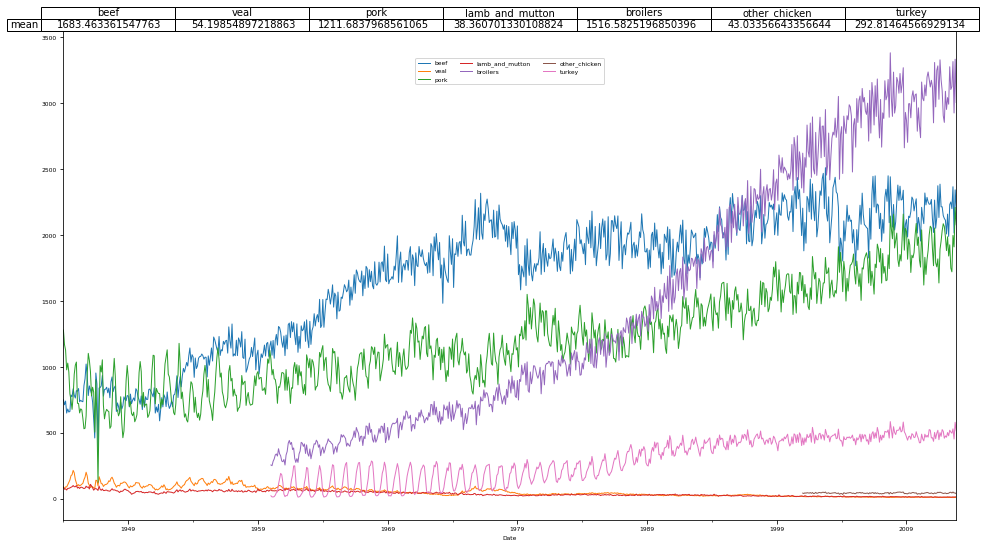

In [17]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel("Date", fontsize=6)

# Add summary table information to the plot
ax.table(
    cellText=meat_mean.values,
    colWidths=[0.15] * len(meat_mean.columns),
    rowLabels=meat_mean.index,
    colLabels=meat_mean.columns,
    loc="top",
)

# Specify the fontsize and location of your legend
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()


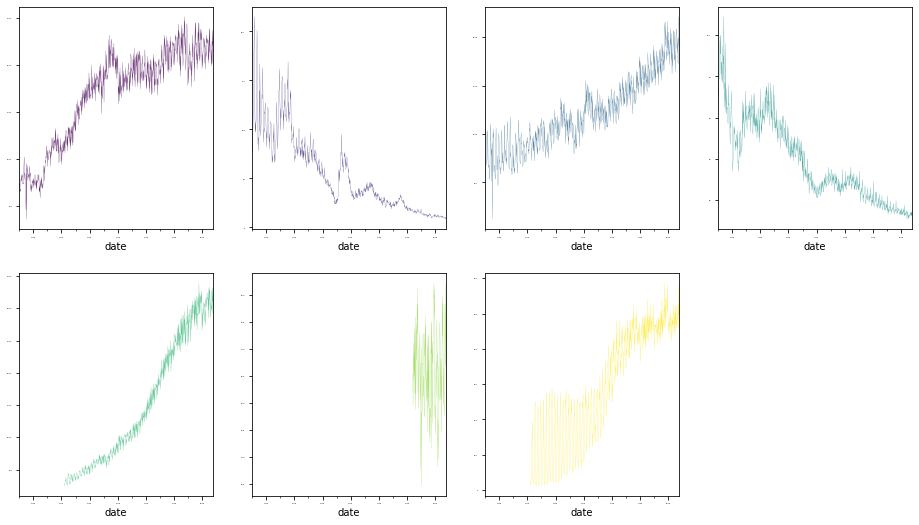

In [18]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(
    subplots=True,
    layout=(2, 4),
    sharex=False,
    sharey=False,
    colormap="viridis",
    fontsize=2,
    legend=False,
    linewidth=0.2,
)

plt.show()


## Find relationships between multiple time series


In [19]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[["beef", "pork"]].corr(method="spearman"))

# Print the correlation between beef and pork columns
print(0.827587)


          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [20]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
pd.set_option("display.precision", 6)
print(meat[["pork", "veal", "turkey"]].corr(method="pearson"))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)


            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


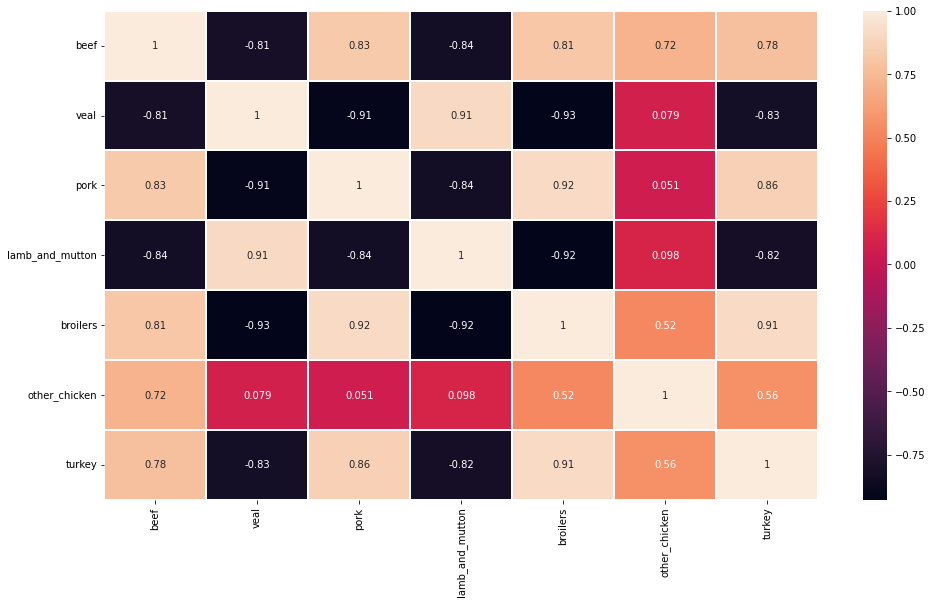

In [21]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method="spearman")

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat, annot=True, linewidths=0.4, annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


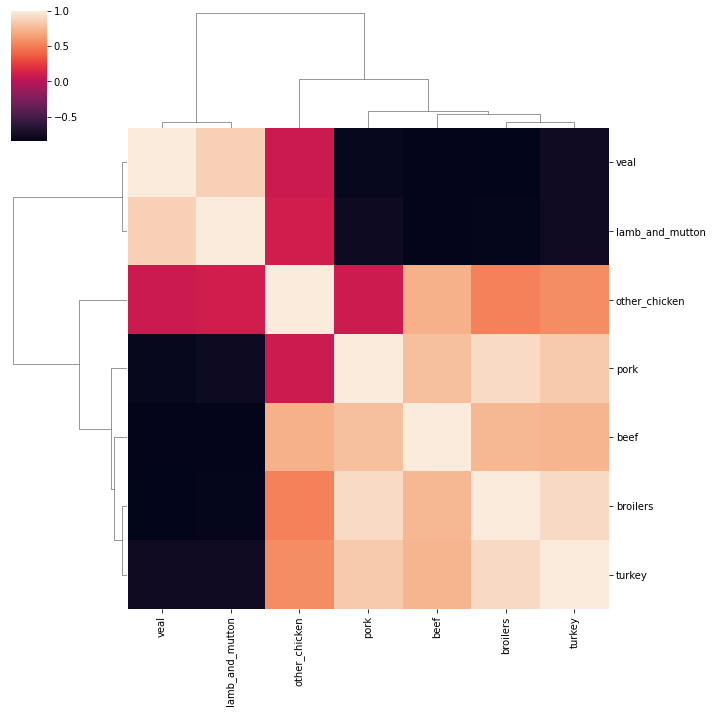

In [22]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method="pearson")

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat, row_cluster=True, col_cluster=True, figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
